# Purpose of this simulation


In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import tables
import aopy
import sklearn
from weights import *
from weights_linear_regression import calc_R2_with_sim_C
# so that we write in latex
from matplotlib import rc

rc('font', **{'family':'serif','serif':['Palatino']})
rc('text', usetex=False)

np.set_printoptions(precision=5, suppress=True)
sns.set_context('paper')

/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm
/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:8: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,
/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-packages/statsmodels/tsa/base/tsa_model.py:8: FutureWarning: pandas.Float64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import (to_datetime, Int64Index, DatetimeIndex, Period,


# ideas

In [2]:
# this is for creating exp_conditions that scan the difference across the files
#for comparision
#data_dump_folder = '/home/sijia-aw/BMi3D_my/operation_funny_chicken/sim_data/more_neurons/run_3/'
# data_dump_folder = \
# 'D:/sim_data/gaussian_peaks/2022_02_02_gaussian_peaks/'

ROUND_DECIMALS = 3


data_dump_folder = \
'/home/aolab/sijia/data/figure4_convex_stationary_encoder/'
random_seed = 0
n_neurons = 128
# 
mean_first_peak = 50
mean_second_peak = 100
std = 3
ENCODER_CHANGE_MODE = "same"

# clda setup 
rho = 0.5
batchlen = 100

# noises = np.arange(9)
# noises = np.exp2(noises)
noises = [32]
noise = 32

smoothness_coef = 0.1
num_of_lags = 3#  this is the K in the formulation, the number of batch updated feature scores we expect it to be.
past_batch_decay_factor = 0.2


exp_conds = []

sparsity_array = [0.06]
smoothness_array = np.arange(0.0, 0.15, 0.025) # this is different from the start out from the full feature set

sparsity_array = np.round(sparsity_array, ROUND_DECIMALS)
smoothness_array = np.round(smoothness_array, ROUND_DECIMALS)

num_of_features_array  = [32]   # specify how many features we want to use, or None
#TODO: add 32 to that number of features array

for sparsity_val in sparsity_array:
    for smoothness_val in smoothness_array:
        for num_of_features in num_of_features_array:
            exp_conds_add = [f'joint_convex_{1.0}_{random_seed}_noise_{noise}_{n_neurons}_{mean_second_peak}_{std}_clda_rho_{rho}_batchlen_{batchlen}_sparsity_{sparsity_val}_smooth_{smoothness_val}_lags_{num_of_lags}_decay_{past_batch_decay_factor}_num_feats_{num_of_features}_{ENCODER_CHANGE_MODE}' ]
            exp_conds.extend(exp_conds_add)
        #exp_conds.extend(exp_conds_keep)

feature_selection_schemes = ['w/o feature selection', 'convex', 'subset throughout']

NUM_SPARSITY, NUM_SMOOTH = len(sparsity_array), len(smoothness_array)

print("the folder at which data is located:")
print(data_dump_folder)
print(f"we have {len(exp_conds)}" , f"num of sparsity vals {NUM_SPARSITY}", f'num of smoothness vals {NUM_SMOOTH}')


for e in exp_conds: print(e)


the folder at which data is located:
/home/aolab/sijia/data/figure4_convex_stationary_encoder/
we have 6 num of sparsity vals 1 num of smoothness vals 6
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.0_lags_3_decay_0.2_num_feats_32_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.025_lags_3_decay_0.2_num_feats_32_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.05_lags_3_decay_0.2_num_feats_32_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.075_lags_3_decay_0.2_num_feats_32_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.1_lags_3_decay_0.2_num_feats_32_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.125_lags_3_decay_0.2_num_feats_32_same


In [3]:

from afs_files import load_feature_selection_files
(exp_data_all, exp_metadata_all) = load_feature_selection_files(data_dump_folder, exp_conds)
print(f'we collected {len(exp_data_all)} number of experiments')

/home/aolab/sijia/analyze/aopy/preproc/bmi3d.py:382: UserWarning: Warning: no sync clock connected! This will usually result in problems.
  warnings.warn("Warning: no sync clock connected! This will usually result in problems.")
/home/aolab/sijia/analyze/aopy/preproc/bmi3d.py:449: UserWarning: No sync events present, using bmi3d events instead
  warnings.warn("No sync events present, using bmi3d events instead")


we collected 6 number of experiments


# Check feature selection strategies

## check feature weights 

Text(0.5, 1.0, 'Feature distribution std 3 Hz')

findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


findfont: Font family ['serif'] not found. Falling back to DejaVu Sans.


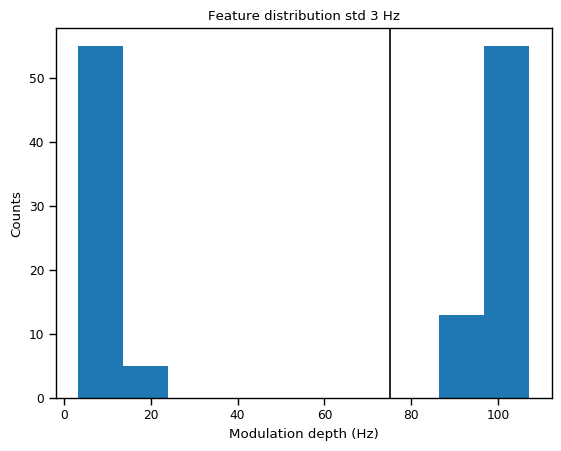

In [4]:
feature_weights = exp_data_all[1]['feature_selection']['feature_weights']
# plot the histogram of the feature weights

fig_weight, ax_weight = plt.subplots()
ax_weight.hist(feature_weights)
ax_weight.axvline(x = 75, color = 'k')
ax_weight.set_xlabel('Modulation depth (Hz)')
ax_weight.set_ylabel('Counts')
ax_weight.set_title(f'Feature distribution std {std} Hz')

## check between conditions

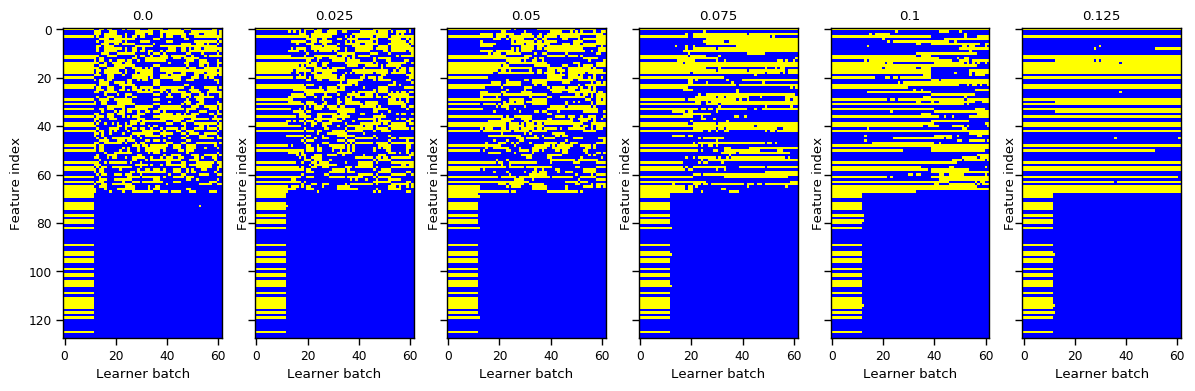

In [5]:
import importlib 
from afs_plotting import plot_feature_selection

num_columns = NUM_SMOOTH

fig_feat_activity, ax_feat_activity = plt.subplots(1, num_columns, 
                                                   sharey = True,
                                                   figsize = (12, 4))



for i, (e, a, s) in enumerate(zip(exp_data_all,  ax_feat_activity, smoothness_array)):
    plot_feature_selection(e['feature_selection']['feat_set'], ax = a)
    
    #only title the exp if there are three exp, right. 
    a.set_title(np.round(s, decimals = ROUND_DECIMALS))

fig_feat_activity.tight_layout()


In [6]:
# next question I ask,  how many features are being selected, anyway? 
num_features_exp_by_batch = []

selected_feature_batches = [exp_data_all[i]['feature_selection']['feat_set'] for i in range(len(exp_data_all))]

for i,e in enumerate(exp_data_all):

    active_set = e['feature_selection']['feat_set']

    num_features_over_batch = np.sum(active_set, axis = 1)
    num_features_exp_by_batch.append(num_features_over_batch.copy())

num_features_exp_by_batch = np.array(num_features_exp_by_batch)
selected_feature_batches = np.array(selected_feature_batches)

In [7]:
print(selected_feature_batches.shape)

selected_features_conds_by_feature_batches = np.moveaxis(selected_feature_batches, 1, 2)


smoothness_conds_by_batch = \
calculate_feature_smoothness_multiple_conditions(selected_features_conds_by_feature_batches)

print(smoothness_conds_by_batch.shape)

(6, 62, 128)
(6, 62)


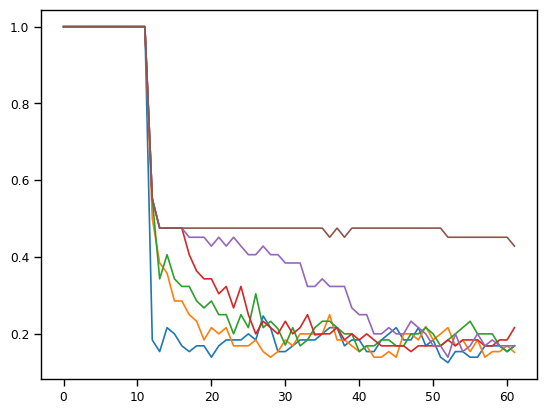

In [8]:
# make a figure that plots the smoothness

fig_smoothness, ax_smoothness = plt.subplots()
ax_smoothness.plot( smoothness_conds_by_batch.T)

In [9]:
# next question I ask,  how many features are being selected, anyway? 
num_features_exp_by_batch = []

for i,e in enumerate(exp_data_all):

    active_set = e['feature_selection']['feat_set']

    num_features_over_batch = np.sum(active_set, axis = 1)
    num_features_exp_by_batch.append(num_features_over_batch.copy())


num_features_exp_by_batch = np.array(num_features_exp_by_batch)
selected_feature_batches = np.array(selected_feature_batches)


# Behaviour comparision

## count how many rewards

In [10]:
fps = 60

reward_rate_all = list()
window_time_stamps_all = list()
NUM_EXP = len(exp_data_all)

total_rewards_all = list()

for i in range(NUM_EXP):

    time_stamps = exp_data_all[i]['events']['time'] / fps
    events = exp_data_all[i]['events']['event']
    
    num_rewards = np.count_nonzero(events == b'REWARD')

    (reward_rate, window_time_stamps) = aopy.analysis.calc_running_event_rate(b'REWARD', events, time_stamps, 
                                                                window_size= 120,
                                                                 window_step= 30)
    reward_rate_all.append(reward_rate)
    window_time_stamps_all.append(window_time_stamps)
    total_rewards_all.append(num_rewards)


window_stamps_all = np.array(window_time_stamps_all)
reward_rate_all = np.array(reward_rate_all) 
reward_rate_all = reward_rate_all.reshape((NUM_EXP,-1))
window_stamps_all = window_stamps_all.reshape((NUM_EXP,-1))

total_rewards_all = np.array(total_rewards_all)

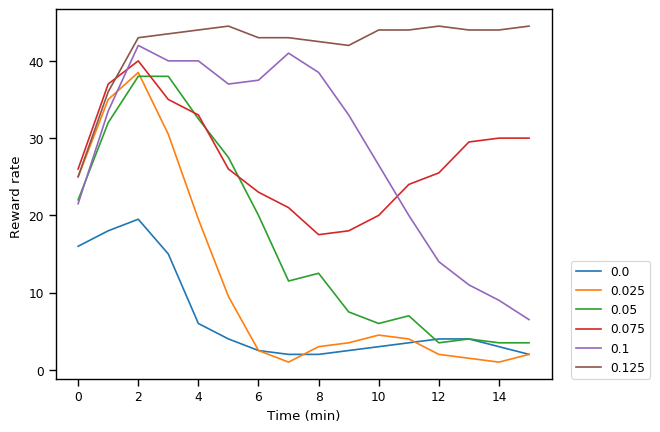

In [11]:
colors = ['blue', 'orange', 'red']

plt.plot(reward_rate_all.T)
plt.xlabel('Time (min)')
plt.ylabel('Reward rate ')
plt.legend(np.round(smoothness_array,ROUND_DECIMALS), loc=(1.04,0))


# Summary Figure for Figure 4

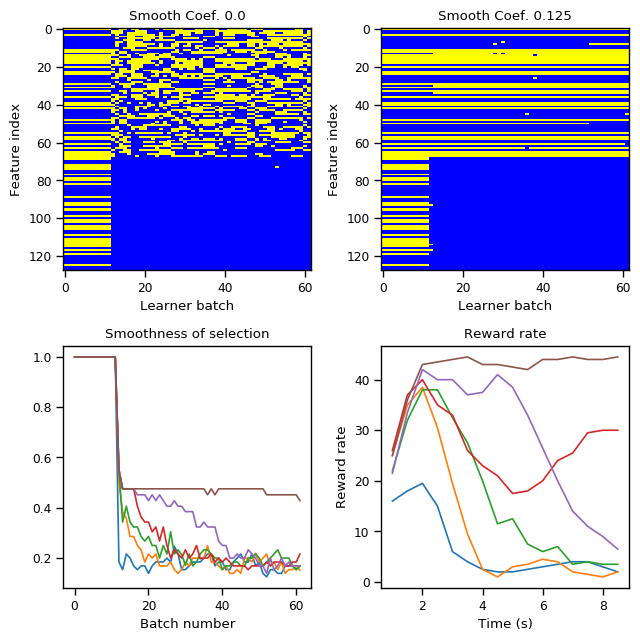

In [12]:
# we make a 4 by 4 figure

figure4, summary_axes = plt.subplots(2,2, figsize = (6.5, 6.5))

active_set_to_plot_indices = [0, -1]

for i, a in enumerate(active_set_to_plot_indices):
    # the top 2 are the feature selection plots
    plot_feature_selection(exp_data_all[a]['feature_selection']['feat_set'], 
                        ax = summary_axes[0,i])

    summary_axes[0,i].set_title(f'Smooth Coef. {smoothness_array[a]}')

# plot the smoothness of the features
summary_axes[1,0].plot(smoothness_conds_by_batch.T)
summary_axes[1,0].set_xlabel('Batch number')
summary_axes[1,0].set_title('Smoothness of selection')


# plot the reward rate
summary_axes[1,1].plot(window_time_stamps / 60, reward_rate_all.T)
summary_axes[1,1].set_ylabel('Reward rate')
summary_axes[1,1].set_xlabel('Time (s)')
summary_axes[1,1].set_title('Reward rate')

figure4.tight_layout()

# Look at the interaction effects of the algorithm

In [13]:
# this is for creating exp_conditions that scan the difference across the files
#for comparision
#data_dump_folder = '/home/sijia-aw/BMi3D_my/operation_funny_chicken/sim_data/more_neurons/run_3/'
# data_dump_folder = \
# 'D:/sim_data/gaussian_peaks/2022_02_02_gaussian_peaks/'

ROUND_DECIMALS = 3


data_dump_folder = \
'/home/aolab/sijia/data/figure4_convex_stationary_encoder/'
random_seed = 0
n_neurons = 128
# 
mean_first_peak = 50
mean_second_peak = 100
std = 3
ENCODER_CHANGE_MODE = "same"

# clda setup 
rho = 0.5
batchlen = 100

# noises = np.arange(9)
# noises = np.exp2(noises)
noises = [32]
noise = 32

smoothness_coef = 0.1
num_of_lags = 3#  this is the K in the formulation, the number of batch updated feature scores we expect it to be.
past_batch_decay_factor = 0.2


exp_conds = []

sparsity_array = [0.06]
smoothness_array = np.arange(0.0, 0.15, 0.025) # this is different from the start out from the full feature set

sparsity_array = np.round(sparsity_array, ROUND_DECIMALS)
smoothness_array = np.round(smoothness_array, ROUND_DECIMALS)

num_of_features_array  = [8, 16, 32, 64, 96]   # specify how many features we want to use, or None
#TODO: add 32 to that number of features array


for smoothness_val in smoothness_array:
    for num_of_features in num_of_features_array:
        exp_conds_add = [f'joint_convex_{1.0}_{random_seed}_noise_{noise}_{n_neurons}_{mean_second_peak}_{std}_clda_rho_{rho}_batchlen_{batchlen}_sparsity_{sparsity_val}_smooth_{smoothness_val}_lags_{num_of_lags}_decay_{past_batch_decay_factor}_num_feats_{num_of_features}_{ENCODER_CHANGE_MODE}' ]
        exp_conds.extend(exp_conds_add)
        #exp_conds.extend(exp_conds_keep)


NUM_FEATURES, NUM_SMOOTH = len(num_of_features_array), len(smoothness_array)

print("the folder at which data is located:")
print(data_dump_folder)
print(f"we have {len(exp_conds)}" , f"num of sparsity vals {NUM_SPARSITY}", f'num of smoothness vals {NUM_SMOOTH}')


for e in exp_conds: print(e)

the folder at which data is located:
/home/aolab/sijia/data/figure4_convex_stationary_encoder/
we have 30 num of sparsity vals 1 num of smoothness vals 6
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.0_lags_3_decay_0.2_num_feats_8_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.0_lags_3_decay_0.2_num_feats_16_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.0_lags_3_decay_0.2_num_feats_32_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.0_lags_3_decay_0.2_num_feats_64_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.0_lags_3_decay_0.2_num_feats_96_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.025_lags_3_decay_0.2_num_feats_8_same
joint_convex_1.0_0_noise_32_128_100_3_clda_rho_0.5_batchlen_100_sparsity_0.06_smooth_0.025_lags_3_deca

In [14]:

from afs_files import load_feature_selection_files, load_and_convert_clda_pickle_files
(exp_data_all, exp_metadata_all) = load_feature_selection_files(data_dump_folder, exp_conds)
clda_data_all = load_and_convert_clda_pickle_files(data_dump_folder, exp_conds)
print(f'we collected {len(exp_data_all)} number of experiments')

we collected 30 number of experiments


In [15]:
# next question I ask,  how many features are being selected, anyway? 
num_features_exp_by_batch = []

for i,e in enumerate(exp_data_all):

    active_set = e['feature_selection']['feat_set']

    num_features_over_batch = np.sum(active_set, axis = 1)
    num_features_exp_by_batch.append(num_features_over_batch.copy())


num_features_exp_by_batch = np.array(num_features_exp_by_batch)

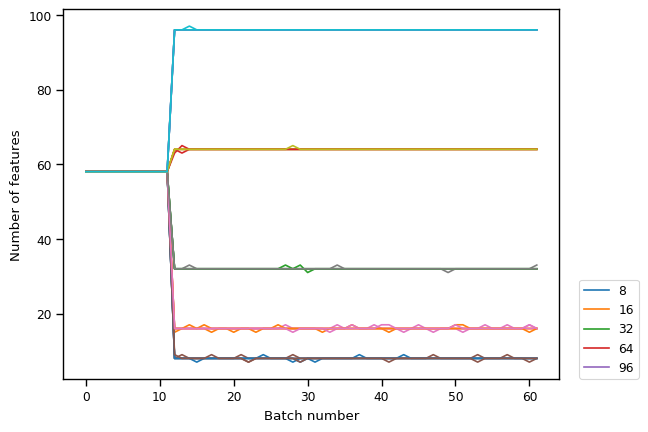

In [16]:
fig_num_features, ax_num_features = plt.subplots()

ax_num_features.plot(num_features_exp_by_batch.T)

ax_num_features.set_xlabel('Batch number')
ax_num_features.set_ylabel('Number of features')
ax_num_features.legend(num_of_features_array, loc=(1.04,0))

In [17]:
# get the final number of features
num_features_final = num_features_exp_by_batch[:, -1]
num_features_sparsity_smoothness = num_features_final.reshape(NUM_SMOOTH, NUM_FEATURES)

In [18]:
num_features_sparsity_smoothness

array([[ 8, 16, 32, 64, 96],
       [ 8, 16, 33, 64, 96],
       [ 8, 16, 32, 64, 96],
       [ 8, 16, 32, 64, 96],
       [ 8, 16, 32, 64, 96],
       [ 8, 16, 32, 64, 96]])

Text(0.5, 1, 'Number of features selected')

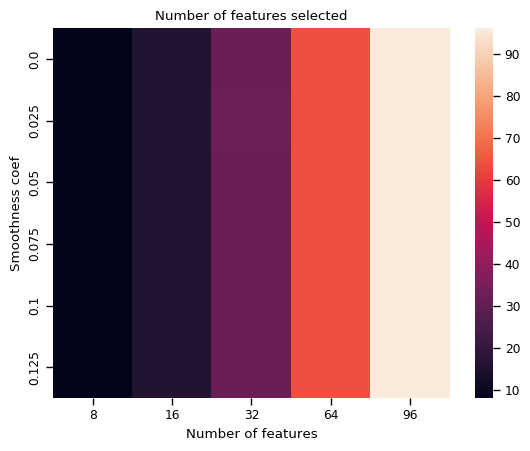

In [19]:
ax = sns.heatmap(num_features_sparsity_smoothness, 
            xticklabels=num_of_features_array, 
            yticklabels= smoothness_array)
ax.set_ylabel('Smoothness coef')
ax.set_xlabel('Number of features')
ax.set_title('Number of features selected')


/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-packages/matplotlib/cbook/__init__.py:1402: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  ndim = x[:, None].ndim
/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-packages/matplotlib/axes/_base.py:276: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/aolab/miniconda3/envs/sijia-feature-analysis/lib/python3.8/site-packages/matplotlib/axes/_base.py:278: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]
/home/aolab/miniconda3/envs/sijia-feature-analysis/

Text(0, 0.5, 'Number of features')

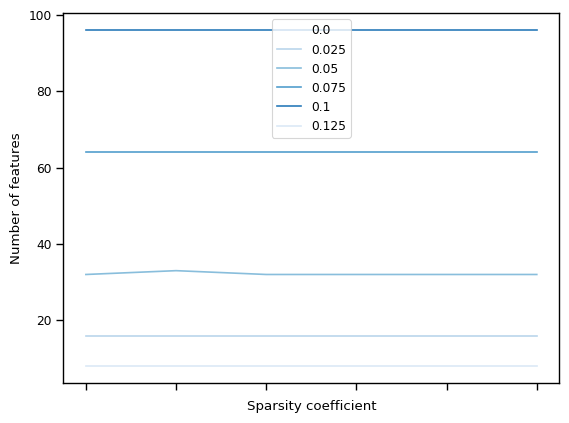

In [20]:
sns.set_palette("Blues")

ax  = sns.lineplot(data = num_features_sparsity_smoothness, dashes=False)
ax.set_xticklabels(sparsity_array)
ax.legend(smoothness_array)

ax.set_xlabel('Sparsity coefficient')
ax.set_ylabel('Number of features')

## Calculate the smoothness

In [21]:
# next question I ask,  how many features are being selected, anyway? 
num_features_exp_by_batch = []

selected_feature_batches = [exp_data_all[i]['feature_selection']['feat_set'] for i in range(len(exp_data_all))]

for i,e in enumerate(exp_data_all):

    active_set = e['feature_selection']['feat_set']

    num_features_over_batch = np.sum(active_set, axis = 1)
    num_features_exp_by_batch.append(num_features_over_batch.copy())

num_features_exp_by_batch = np.array(num_features_exp_by_batch)
selected_feature_batches = np.array(selected_feature_batches)

In [22]:
selected_features_conds_by_feature_batches = np.moveaxis(selected_feature_batches, 1, 2)


smoothness_conds_by_batch = \
calculate_feature_smoothness_multiple_conditions(selected_features_conds_by_feature_batches)

print(smoothness_conds_by_batch.shape)

(30, 62)


In [23]:
smoothness_last = smoothness_conds_by_batch[:, -1]
smoothness_last_reshape = smoothness_last.reshape(NUM_SMOOTH, NUM_FEATURES)



Text(0.5, 22.71666666666666, 'Number of features')

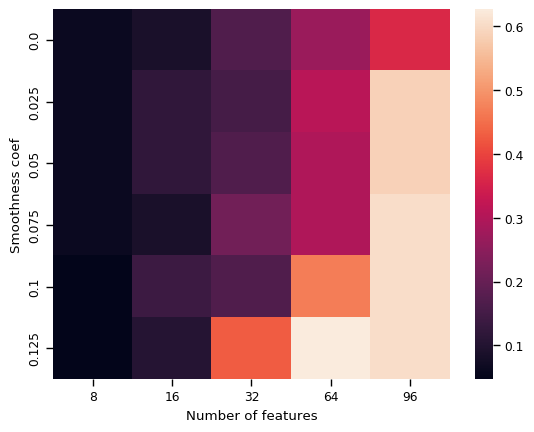

In [24]:
ax = sns.heatmap(smoothness_last_reshape,
            xticklabels=num_of_features_array, 
            yticklabels= smoothness_array)
ax.set_ylabel('Smoothness coef')
ax.set_xlabel('Number of features')

## calculate relevance

In [25]:
R_2_over_batches_all_exp = []


X_VEL_STATE = 3
Y_VEL_STATE = 5
CONST_STATE = 6

for exp_index in range(len(exp_data_all)):
    # intended_kin = exp_data_all[exp_index]['bmi3d_clda']['intended_kin']
    # spike_counts_batch = exp_data_all[exp_index]['bmi3d_clda']['spike_counts_batch']
    
    try:
        intended_kin = clda_data_all[exp_index]['intended_kin']
        spike_counts_batch = clda_data_all[exp_index]['spike_counts_batch']

        intended_kin = np.array(intended_kin)

        intended_velocities = intended_kin[:, [X_VEL_STATE, Y_VEL_STATE, CONST_STATE],:]
        # # get C_mat
        feature_selection_data = exp_data_all[exp_index]['feature_selection']
        C_mat = feature_selection_data["C_mat"]
        feat_set = feature_selection_data["feat_set"]

        # # calculate R_2 over batches
        R_2_over_batches = calc_R2_with_sim_C(spike_counts_batch, 
                                            intended_velocities,
                                            C_mat, feat_set, debug = False)
        
        # #save  the results
        R_2_over_batches_all_exp.append(R_2_over_batches)
        
        
    except Exception as e:
        print(f"KeyError: {e}not found in data.")
    
    # #save  the results
    # R_2_over_batches_all_exp.append(R_2_over_batches)

    
R_2_over_batches_all_exp = np.array(R_2_over_batches_all_exp)
R_2_over_batches_all_exp_gap = R_2_over_batches_all_exp.T

In [26]:
# apply moving average to the first axis
window_size = 6
weights = np.ones(window_size) / window_size
R_2_over_batches_all_exp_gap_ma = np.apply_along_axis(lambda x: np.convolve(x, weights, mode='valid'), 
                                                   axis=0,
                                                   arr=R_2_over_batches_all_exp_gap)

(-1, 1)

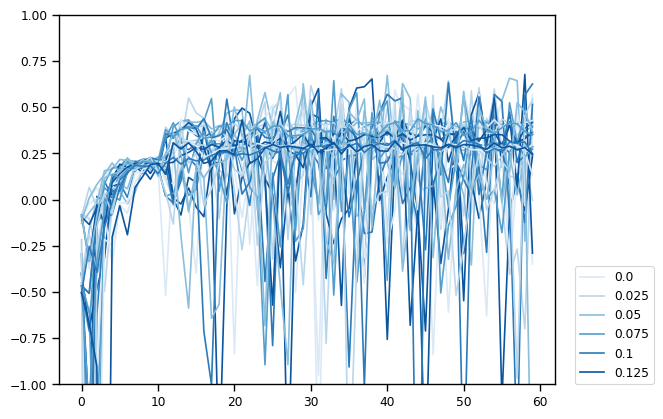

In [27]:
plt.plot(R_2_over_batches_all_exp_gap)
plt.legend(smoothness_array, loc = (1.04, 0))
plt.ylim([-1, 1])

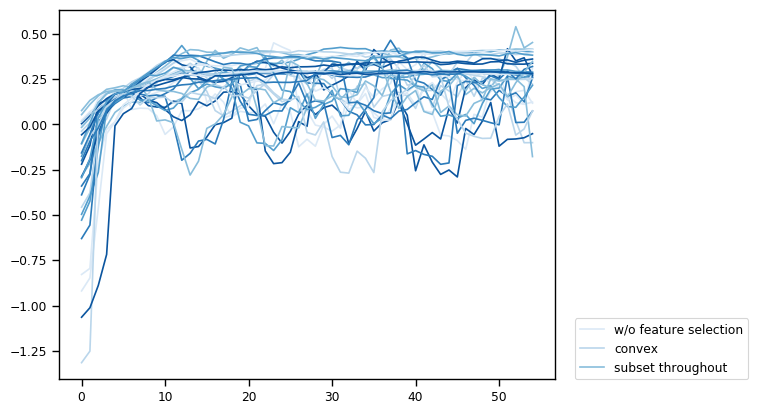

In [28]:
plt.plot(R_2_over_batches_all_exp_gap_ma)
plt.legend(feature_selection_schemes, 
           loc=(1.04,0))

Text(49.91666666666667, 0.5, 'Smoothness coef.')

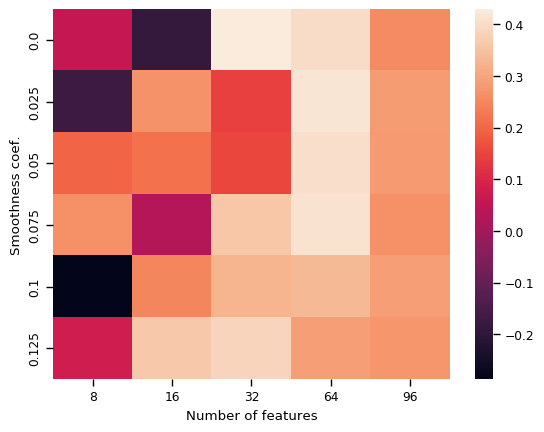

In [29]:
last_batch_for_r2 = 5
R2_last = np.mean(R_2_over_batches_all_exp_gap[-last_batch_for_r2:,:], 
                  axis = 0)
R2_last = R2_last.reshape((NUM_SMOOTH, NUM_FEATURES))

ax = sns.heatmap(R2_last, 
            xticklabels=num_of_features_array, 
            yticklabels= smoothness_array)
ax.set_xlabel('Number of features')
ax.set_ylabel('Smoothness coef.')

In [30]:
# calculate the variance of R_squared
last_batch_for_r2 = 5
R2_std = \
np.std(R_2_over_batches_all_exp_gap_ma[-last_batch_for_r2:,:], axis = 0)

R2_std_smooth_num = R2_std.reshape(NUM_SMOOTH, NUM_FEATURES)

Text(49.91666666666667, 0.5, 'Smoothness coef.')

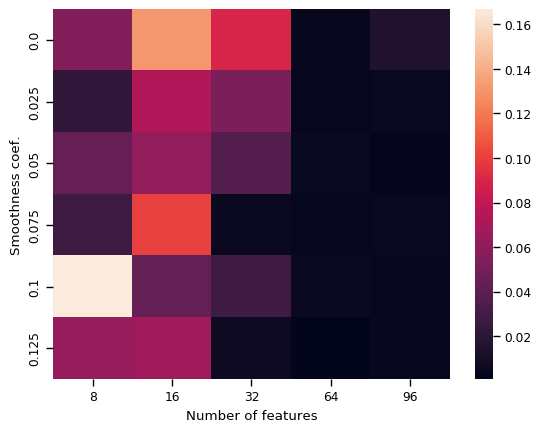

In [31]:
ax = sns.heatmap(R2_std_smooth_num, 
            xticklabels=num_of_features_array, 
            yticklabels= smoothness_array)
ax.set_xlabel('Number of features')
ax.set_ylabel('Smoothness coef.')

6 5


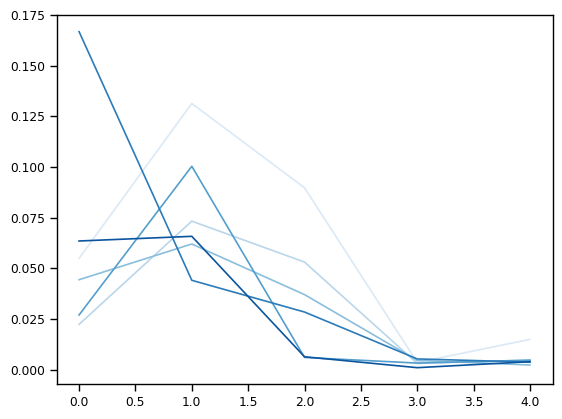

In [32]:
plt.plot(R2_std_smooth_num.T)

print(NUM_SMOOTH, NUM_FEATURES)

## Count how many rewards

In [33]:
fps = 60

reward_rate_all = list()
window_time_stamps_all = list()
NUM_EXP = len(exp_data_all)

total_rewards_all = list()

for i in range(NUM_EXP):

    time_stamps = exp_data_all[i]['events']['time'] / fps
    events = exp_data_all[i]['events']['event']
    
    num_rewards = np.count_nonzero(events == b'REWARD')

    (reward_rate, window_time_stamps) = aopy.analysis.calc_running_event_rate(b'REWARD', events, time_stamps, 
                                                                window_size= 120,
                                                                 window_step= 30)
    reward_rate_all.append(reward_rate)
    window_time_stamps_all.append(window_time_stamps)
    total_rewards_all.append(num_rewards)


window_stamps_all = np.array(window_time_stamps_all)
reward_rate_all = np.array(reward_rate_all) 
reward_rate_all = reward_rate_all.reshape((NUM_EXP,-1))
window_stamps_all = window_stamps_all.reshape((NUM_EXP,-1))

total_rewards_all = np.array(total_rewards_all)

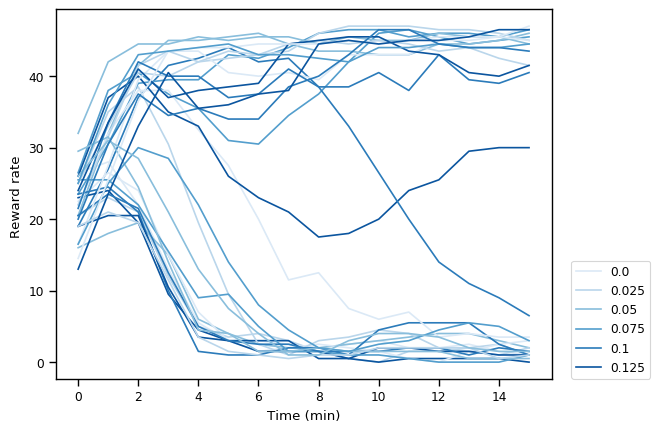

In [34]:
colors = ['blue', 'orange', 'red']

plt.plot(reward_rate_all.T)
plt.xlabel('Time (min)')
plt.ylabel('Reward rate ')
plt.legend(np.round(smoothness_array,ROUND_DECIMALS), loc=(1.04,0))

Text(49.91666666666667, 0.5, 'Smoothness coef.')

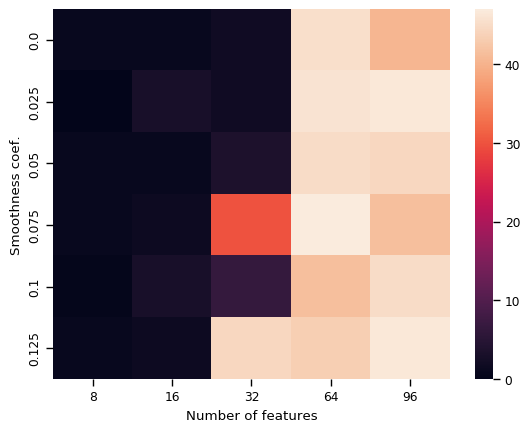

In [35]:
# let's again plot it as a grid

reward_rate_final = reward_rate_all[:, -1]
reward_rate_final = reward_rate_final.reshape(NUM_SMOOTH, NUM_FEATURES)

ax = sns.heatmap(reward_rate_final, 
            xticklabels=num_of_features_array, 
            yticklabels= smoothness_array)
ax.set_xlabel('Number of features')
ax.set_ylabel('Smoothness coef.')

## reward rate vs. rsquared

Text(0, 0.5, 'Reward rate')

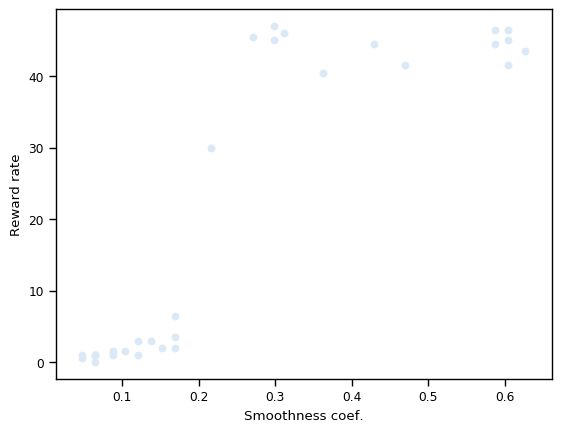

In [36]:
# reward rate 
smoothness_last_flatten = smoothness_last.flatten()
reward_rate_final_flatten = reward_rate_final.flatten()

fig, ax =  plt.subplots()
ax.scatter(smoothness_last_flatten, reward_rate_final_flatten)
ax.set_xlabel('Smoothness coef.')
ax.set_ylabel('Reward rate')

# Make a summary figure

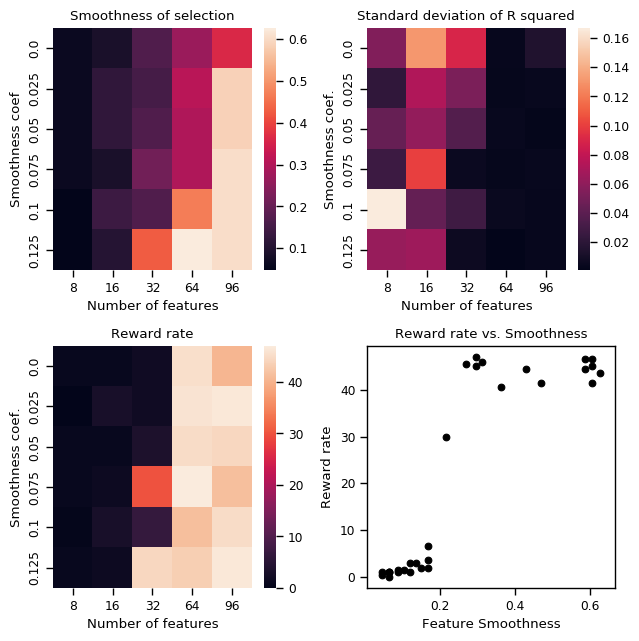

In [37]:
figure4, summary_axes = plt.subplots(2,2, 
                        figsize = (6.5, 6.5))

# top left, we plot smoothness
ax = summary_axes[0,0]
sns.heatmap(smoothness_last_reshape,
            ax = ax,
            xticklabels=num_of_features_array, 
            yticklabels= smoothness_array)
ax.set_ylabel('Smoothness coef')
ax.set_xlabel('Number of features')
ax.set_title('Smoothness of selection')

# top right, we plot the number of features
ax = summary_axes[0,1]
sns.heatmap(R2_std_smooth_num, 
            xticklabels=num_of_features_array, 
            yticklabels= smoothness_array,
            ax = ax)
ax.set_xlabel('Number of features')
ax.set_ylabel('Smoothness coef.')
ax.set_title('Standard deviation of R squared')

# bottom left, we plot the reward rate
ax = summary_axes[1,0]
sns.heatmap(reward_rate_final, 
            ax = ax,
            xticklabels=num_of_features_array, 
            yticklabels= smoothness_array)
ax.set_xlabel('Number of features')
ax.set_ylabel('Smoothness coef.')
ax.set_title('Reward rate')

# bottom right, we plot the relation between smoothness and reward rate
ax = summary_axes[1,1]
ax.scatter(smoothness_last_flatten, reward_rate_final_flatten, color = 'k')
ax.set_xlabel('Feature Smoothness')
ax.set_ylabel('Reward rate')

ax.set_title('Reward rate vs. Smoothness')


figure4.tight_layout()